In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
# 1 Data Loading
#Loaded the Titanic-dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [4]:
#  Dataset Dimensions
print("\nDataset Shape (rows, columns):", df.shape)


Dataset Shape (rows, columns): (891, 12)


In [5]:
#data type of the cols
print("\nData Types:",df.dtypes)


Data Types: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# 2 Data Exploration
#Summary Statistics
print("\nSummary Statistics:",df.describe())


Summary Statistics:        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



Median values of numeric columns:
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


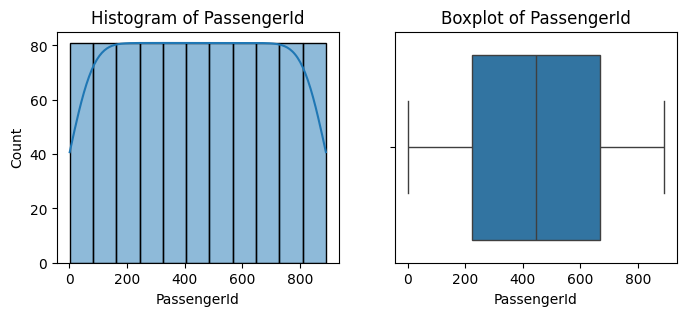

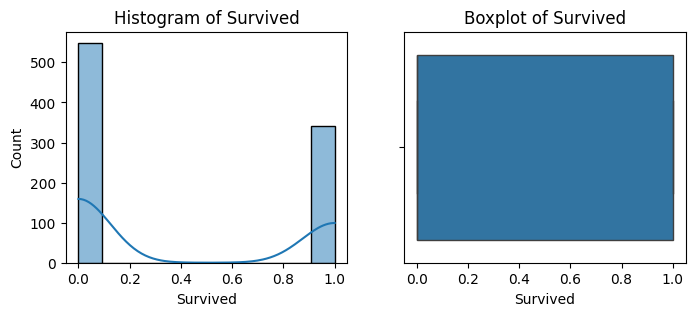

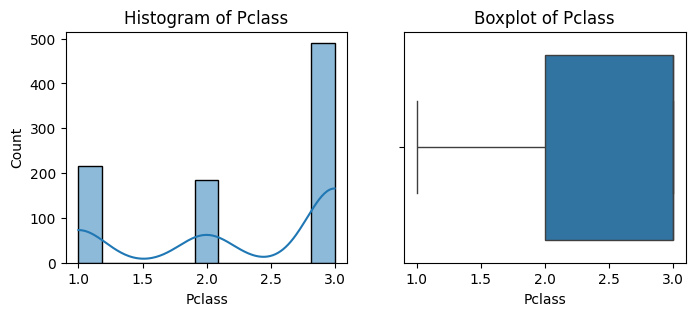

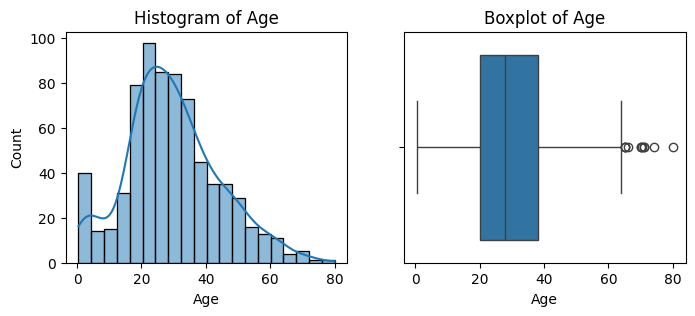

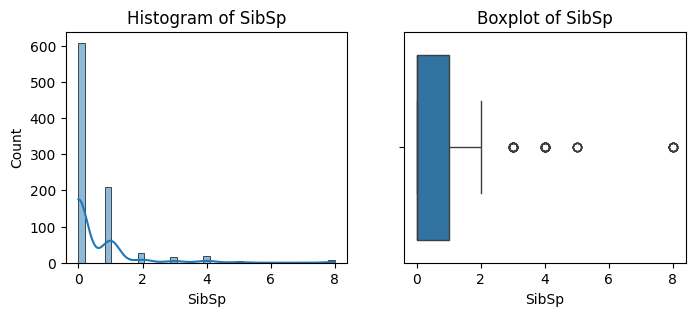

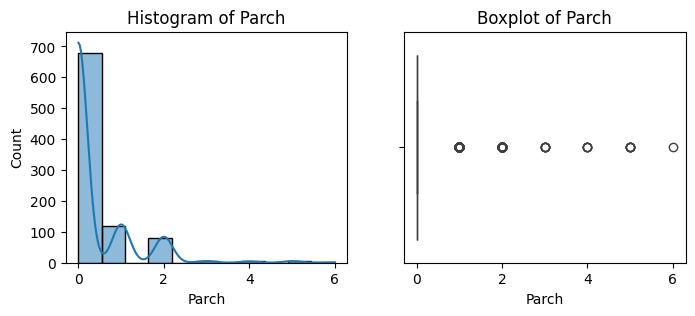

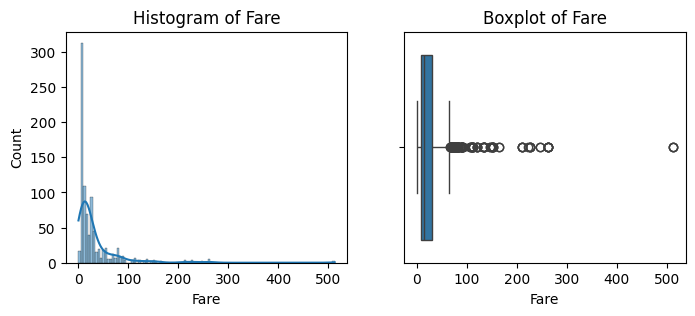

In [12]:
# Median values
print("\nMedian values of numeric columns:")
print(df.median(numeric_only=True))

# visualizing numeric distributions
numeric_features = df.select_dtypes(include=[np.number]).columns

for col in numeric_features:
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogram of {col}")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


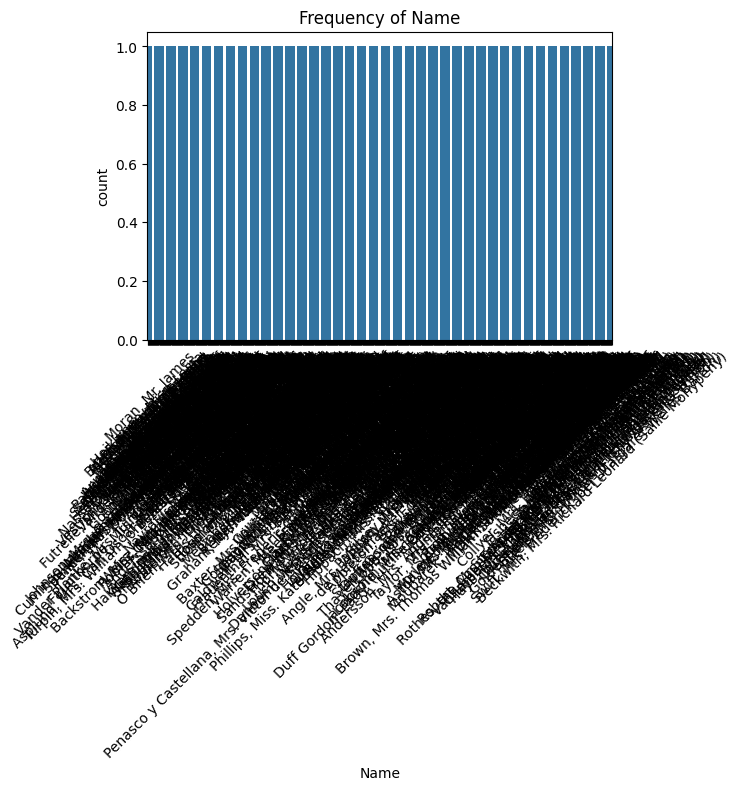

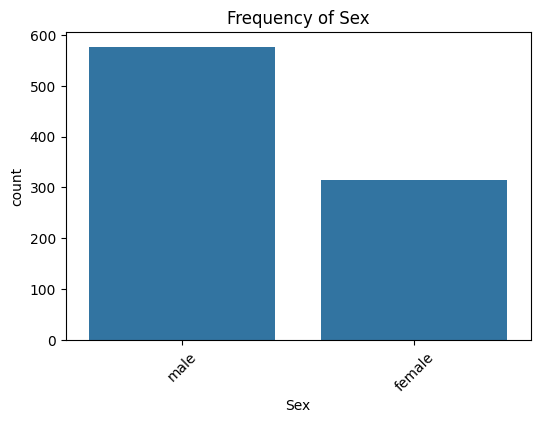

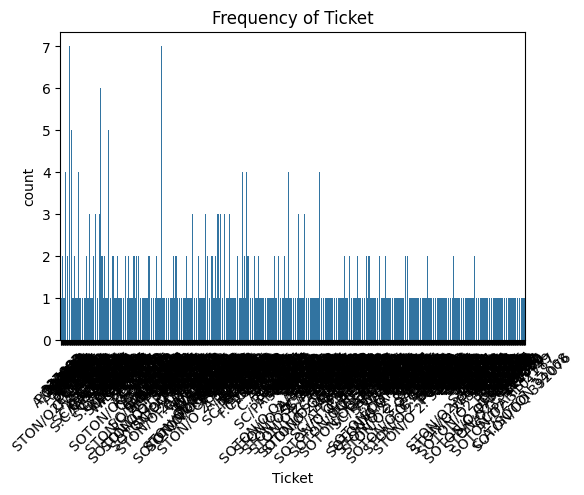

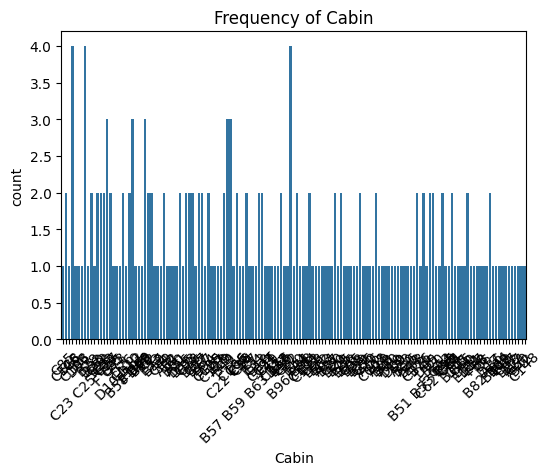

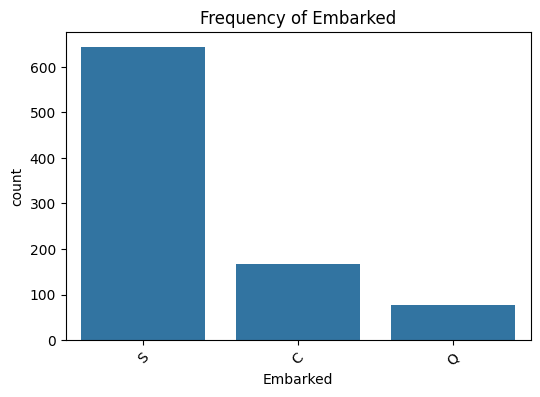

In [21]:
# Frequency distribution
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [13]:
#3 Data Preproccesing

#Handling Missing Values
print("\nMissing values before handling:")
print(df.isnull().sum())
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())





Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-3341711698.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3341711698.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [14]:

#Encode Categorical Variables
label_enc = LabelEncoder()
for col in categorical_features:
    df[col] = label_enc.fit_transform(df[col].astype(str))

print("\nDataset after encoding categorical variables:")
print(df.head())


Dataset after encoding categorical variables:
   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500     47         2  
1  71.2833     81         0  
2   7.9250     47         2  
3  53.1000     55         2  
4   8.0500     47         2  


In [15]:
# Feature Scaling I(Standardization)
scaler = StandardScaler()
scaled_features = df.copy()
scaled_features[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nScaled dataset sample:")
print(scaled_features.head())


Scaled dataset sample:
   PassengerId  Survived    Pclass  Name  Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377   108    1 -0.565736  0.432793 -0.473674   
1    -1.726220  1.266990 -1.566107   190    0  0.663861  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377   353    0 -0.258337 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107   272    0  0.433312  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377    15    1  0.433312 -0.474545 -0.473674   

   Ticket      Fare  Cabin  Embarked  
0     523 -0.502445     47         2  
1     596  0.786845     81         0  
2     669 -0.488854     47         2  
3      49  0.420730     55         2  
4     472 -0.486337     47         2  


In [18]:
# 3 Data Preparation for ML:
X = scaled_features.drop('Survived', axis=1)
y = scaled_features['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Training label : ",y_train.shape)
print("Testing label : ",y_test.shape)


Training set size: (712, 11)
Testing set size: (179, 11)
Training label :  (712,)
Testing label :  (179,)


In [19]:
print("X_train -> type:", type(X_train), "  shape:", X_train.shape)
print("X_test  -> type:", type(X_test),  "  shape:", X_test.shape)
print("y_train -> type:", type(y_train), "  shape:", y_train.shape)
print("y_test  -> type:", type(y_test),  "  shape:", y_test.shape)

X_train -> type: <class 'pandas.core.frame.DataFrame'>   shape: (712, 11)
X_test  -> type: <class 'pandas.core.frame.DataFrame'>   shape: (179, 11)
y_train -> type: <class 'pandas.core.series.Series'>   shape: (712,)
y_test  -> type: <class 'pandas.core.series.Series'>   shape: (179,)
